In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import ScalarFormatter
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split

In [5]:
# Load the data from the csv file
banking_log = pd.read_csv('/Users/sa24/Desktop/Banking TLAB/Banking-Fraud-Analysis/Raw Banking Data/Banking.csv')

In [6]:
#show the first 10 rows
banking_log.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [7]:
banking_log.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
#check missing values in the data
banking_log.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

/var/folders/fz/fjrs1yms7rbcd_w7wg96j1fm0000gn/T/ipykernel_21464/1191009655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=banking_log, x='type', palette= ['red', 'blue', 'green', 'orange', 'purple'])


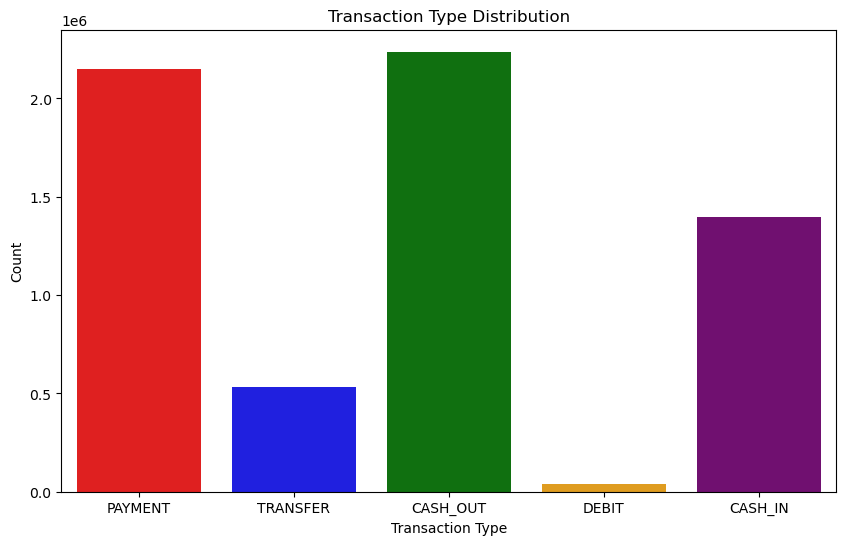

In [9]:
#create a bar graph to plot the types of Tranactions
plt.figure(figsize=(10, 6))
sns.countplot(data=banking_log, x='type', palette= ['red', 'blue', 'green', 'orange', 'purple'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Type Distribution')
plt.show()

In [10]:
#analyze how many cases of fraud are present
fraud_count = banking_log.value_counts('isFraud').to_frame()
fraud_count

,count
isFraud,
0,6354407
1,8213


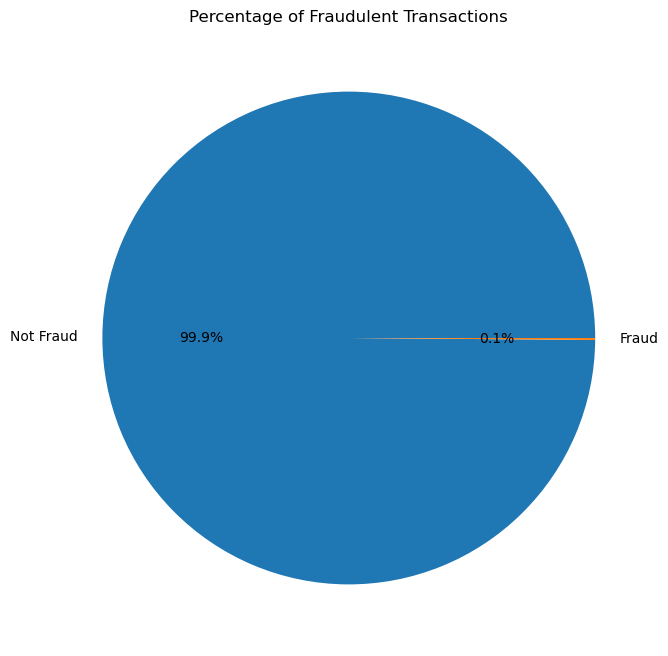

In [11]:
#Check the percentage of fraud in the CSV
plt.figure(figsize=(9,8))
banking_log["isFraud"].value_counts().plot.pie(autopct='%1.1f%%', labels= ["Not Fraud", "Fraud"])
plt.title('Percentage of Fraudulent Transactions')
plt.ylabel("")
plt.show()

# Univariate Analysis




The Pie chart and the value count shows that less than one percent of the 6 million tranactions in the Data set are marked as Fraudulent. Using Univariate Analysis I will locate which transactions types were fraudulent and where fraud is most likly to occur.

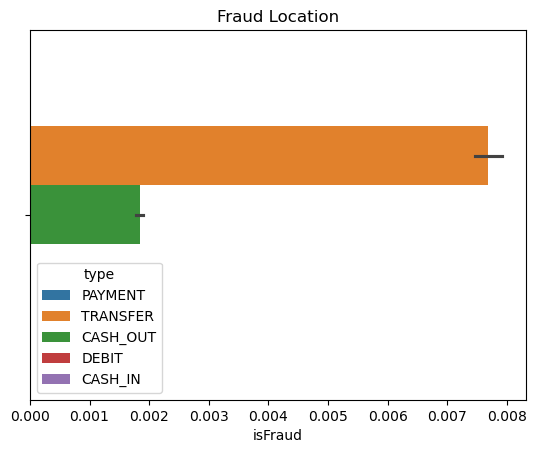

In [12]:
#Check the isFraud column to find out which Transaction type has the most Fraud
sns.barplot(data= banking_log, x= "isFraud" , hue = "type")
plt.title('Fraud Location')
plt.show()

# Locating where fraud lies within the dataset

Transfers account for the second least amount of transactions in the Dataset but it has the highest rate of fraudulent activity. The Next step would be to see how many of the Transfers were actually fraud. The Cash out transaction type also seems to have some fraudulent activities.

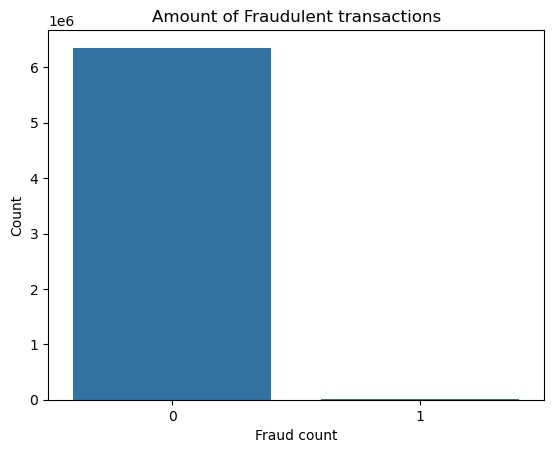

In [19]:
sns.countplot(data=banking_log, x='isFraud')
plt.xlabel('Fraud count')
plt.ylabel('Count')
plt.title('Amount of Fraudulent transactions')
plt.show()

The actual amount of Fraud occuring in the data set is relativley low. This backs up what the pie chart percentage of 99% not fraud and .01% fraud. 

If the count of fraud is so low, how much is happening in both section?

In [20]:
# See which type has the most Flagged Fraud transactions
fraud_transactions= banking_log.groupby('type')['isFlaggedFraud'].sum()

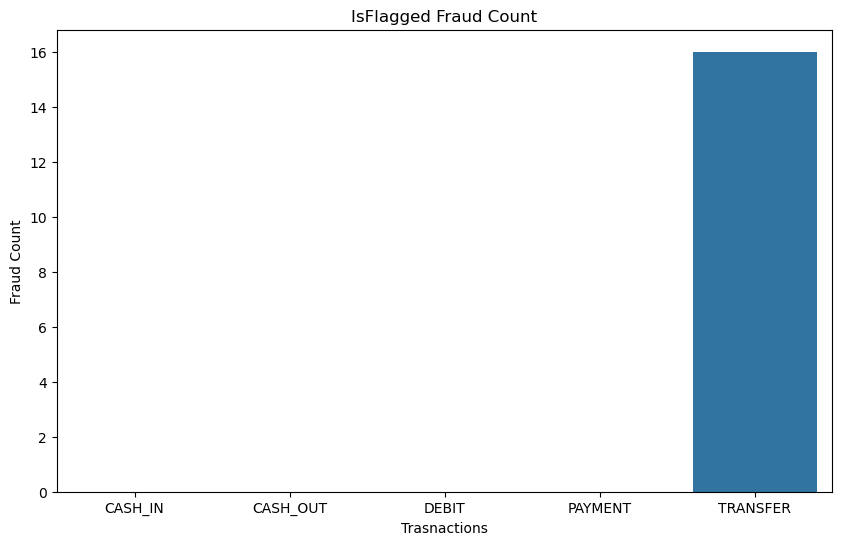

In [21]:
# Plot a Flagged Fraud bar graphs to show the transaction type
plt.figure(figsize=(10,6))
sns.barplot(x=fraud_transactions.index, y=fraud_transactions.values)
plt.xlabel('Trasnactions')
plt.ylabel('Fraud Count')
plt.title('IsFlagged Fraud Count')
plt.show()

Only the Transfer type has rows that are flagged fraud even though the "isFraud" chart showed that Transfer and Cash out had fraud rows. 

# Bivariate Analysis

In [22]:
#sample 1,000,000 random rows from the "banking" csv to do EDA
random_sample= banking_log.sample(1000000, random_state=1)
random_sample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6322570,688,CASH_IN,23557.12,C867750533,8059.00,31616.12,C1026934669,169508.66,145951.53,0,0
3621196,274,PAYMENT,6236.13,C601099070,0.00,0.00,M701283411,0.00,0.00,0,0
1226256,133,PAYMENT,33981.87,C279540931,18745.72,0.00,M577905776,0.00,0.00,0,0
2803274,225,CASH_OUT,263006.42,C11675531,20072.00,0.00,C529577791,390253.56,653259.98,0,0
3201247,249,CASH_OUT,152013.74,C530649214,20765.00,0.00,C1304175579,252719.19,404732.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4576485,328,PAYMENT,876.71,C234077390,0.00,0.00,M921941417,0.00,0.00,0,0
5749073,399,CASH_IN,35023.25,C1371249713,4224068.35,4259091.60,C1288678481,128318.10,93294.85,0,0
5195746,369,PAYMENT,5656.07,C1870222026,0.00,0.00,M1458732817,0.00,0.00,0,0
2730774,212,CASH_OUT,18499.82,C1545700332,0.00,0.00,C1264189275,121368.13,139867.95,0,0


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


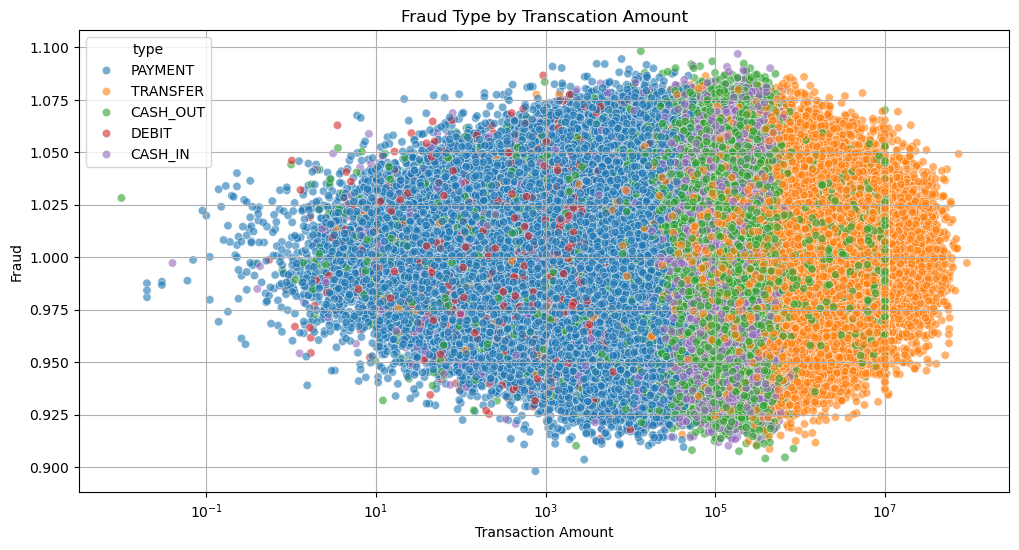

In [23]:
plt.figure(figsize=(12, 6))
y_value = np.random.normal(loc=1, scale=0.02, size=len(banking_log))
# Scatter plot
sns.scatterplot(data=banking_log,x="amount", y=y_value, alpha=0.6, hue="type")
# Log scale for better visualization
plt.xscale("log")
plt.title("Fraud Type by Transcation Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Fraud")
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


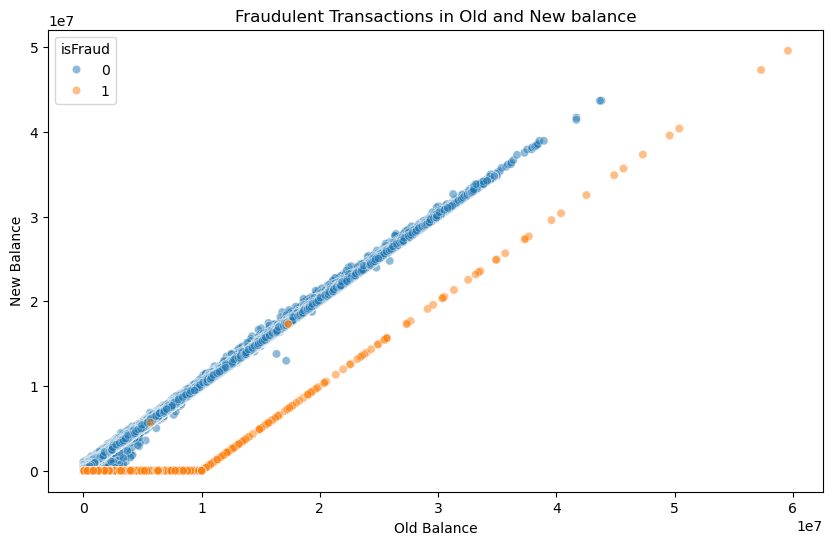

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=banking_log['oldbalanceOrg'], y=banking_log['newbalanceOrig'], hue=banking_log['isFraud'], alpha=0.5)
plt.title('Fraudulent Transactions in Old and New balance')
plt.xlabel('Old Balance')
plt.ylabel('New Balance')
plt.show()

# Result

We can see that in Fraudulent transactions there are alot of accounts that stay at 0 on the Y axis before following the same path as the non Frudulent transaction.The Fraudulent accounts withdraw most if not all of the money from the account. When the account isn't fraudulent the new balance raises steadily

# Multivariate Analysis

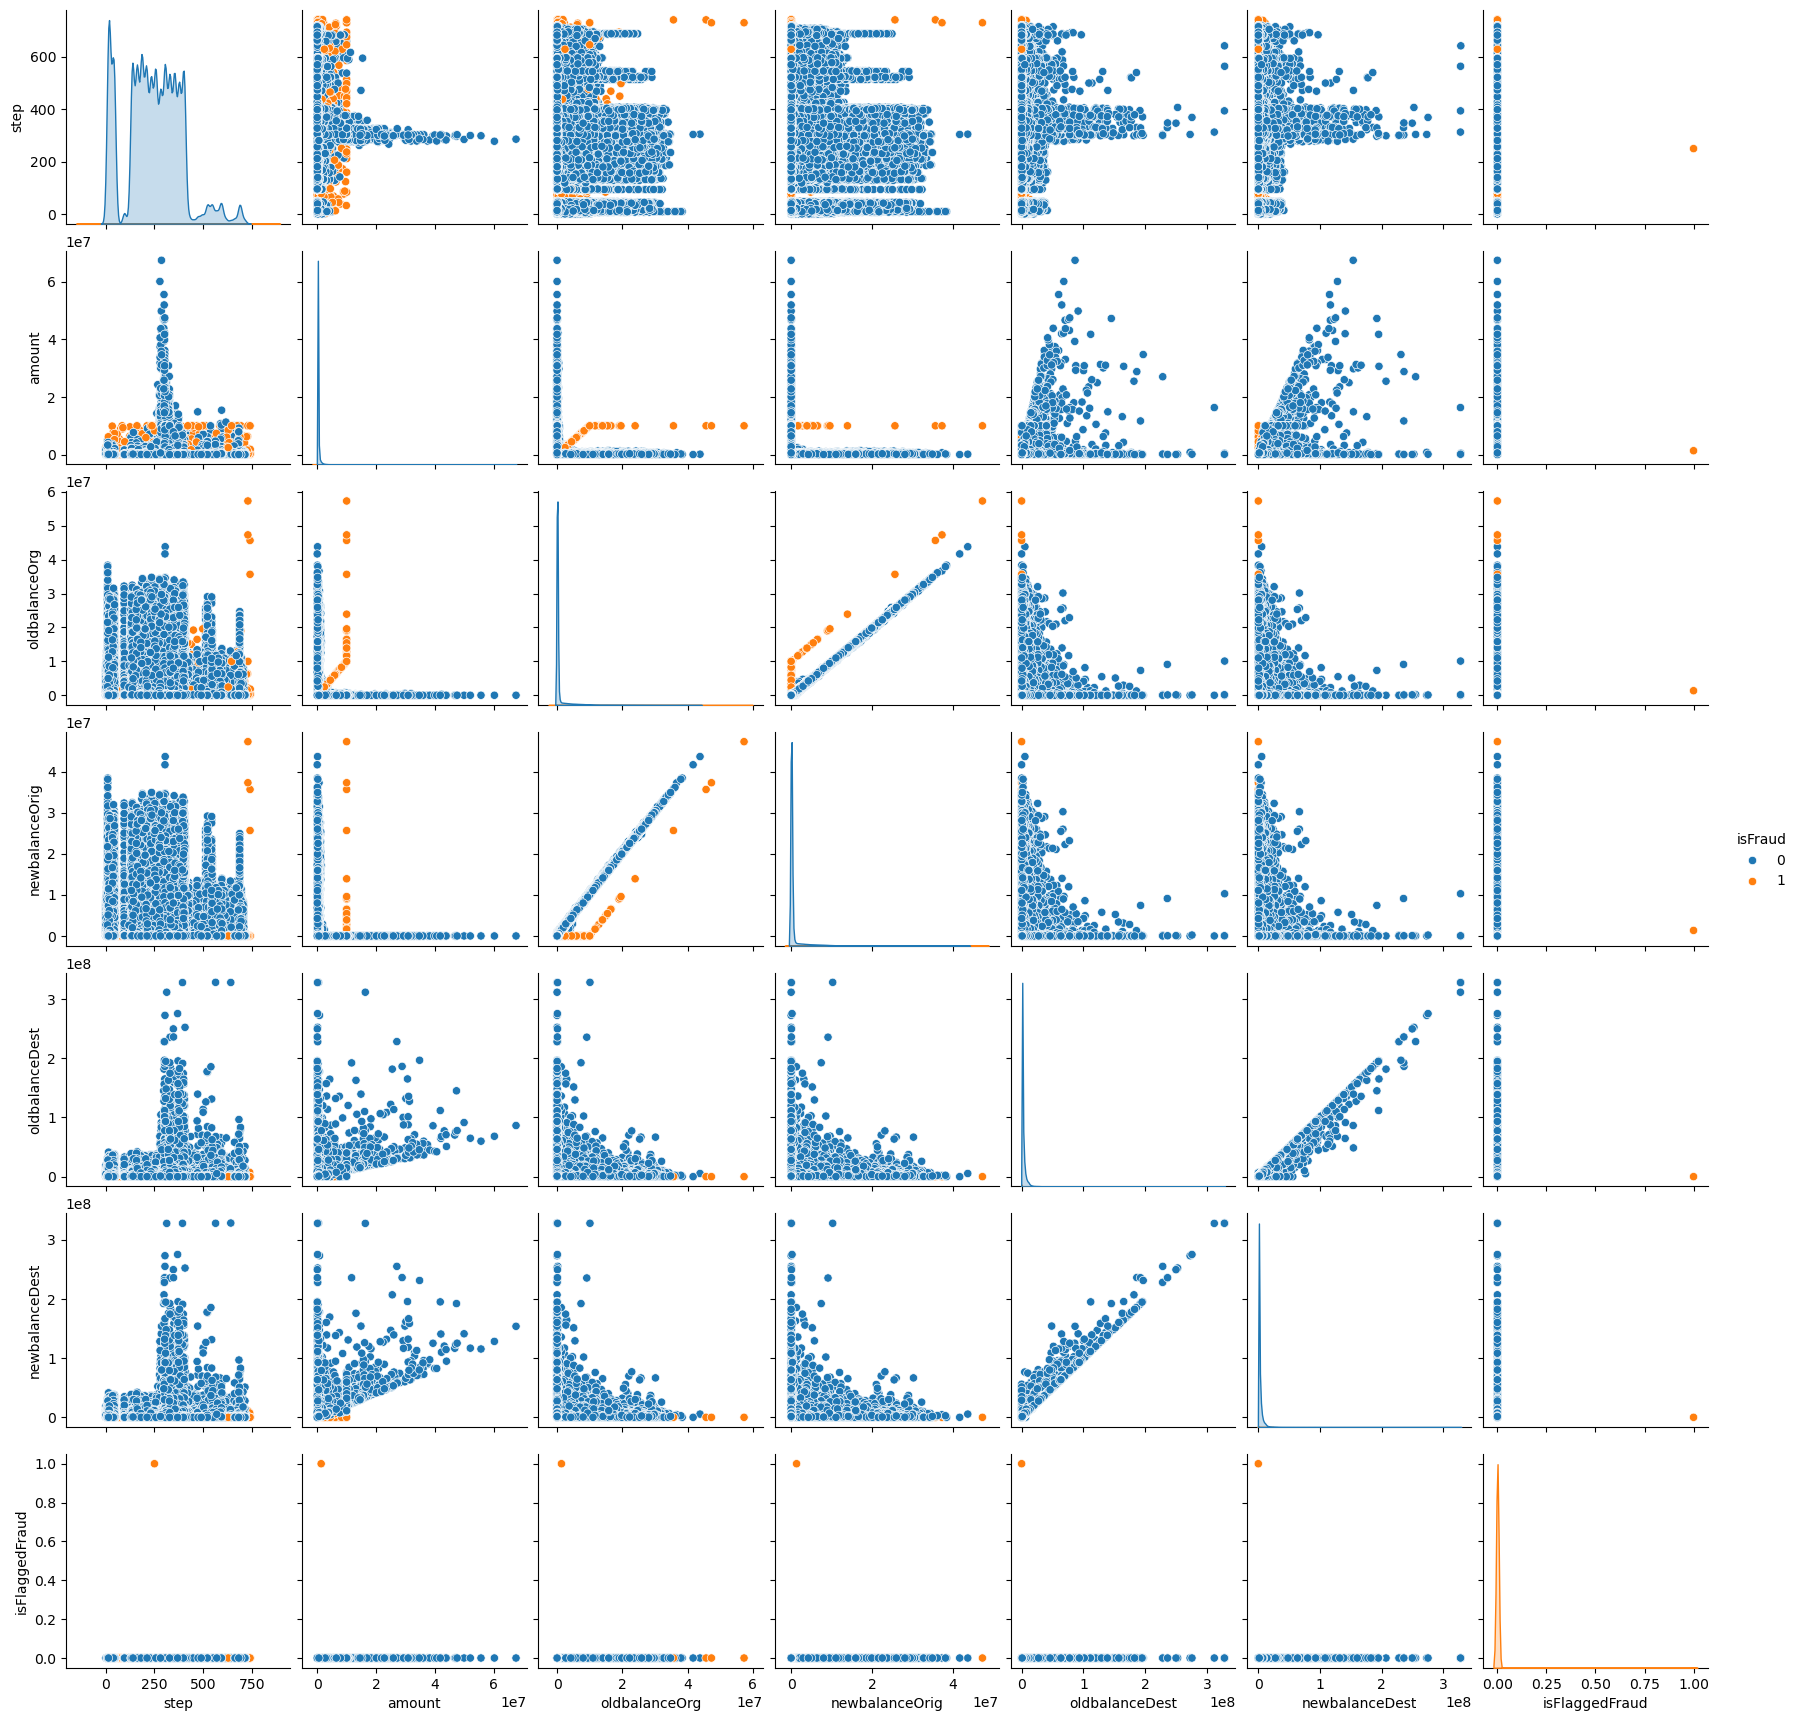

In [26]:
sns.pairplot(random_sample, hue = "isFraud")
plt.show()